# Rotating edge experiment

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import itertools
import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
from lineart import style, transform, draw
from lineart.primatives import EdgeCollection
from lineart.shapes import octahedron

### Shattered single line

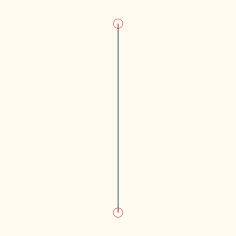

In [4]:
e_prime = EdgeCollection(np.array([[[50,10,0],[50,90,0]]]))
page = draw.quick_draw_edges(e_prime.edges, v=True)
Image(page.image(kind="rgba", ppi=60).png())

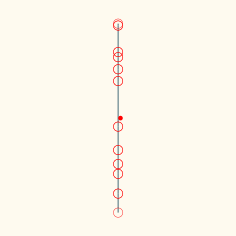

In [5]:
e_split = EdgeCollection(transform.rand_split_edge(e_prime.edges[0],10))
push_point = [51,50, 0]
transform.point_push(e_split, 10,  np.array([push_point]), lin_scale=100, rot_scale=1)
page = draw.quick_draw_edges(e_split.edges, v=True)
page.place(style.full_red.circle(*push_point[:2], 1))
Image(page.image(kind="rgba", ppi=60).png())

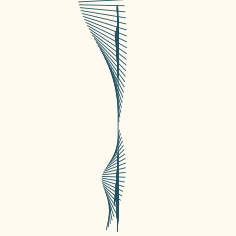

In [6]:

ec = e_split.copy()
page = draw.quick_draw_edges(ec.edges, v=False)

for i in range (25):
    ec.step(1)
    draw.quick_draw_edges(ec.edges, v=False, page=page)

Image(page.image(kind="rgba", ppi=60).png())

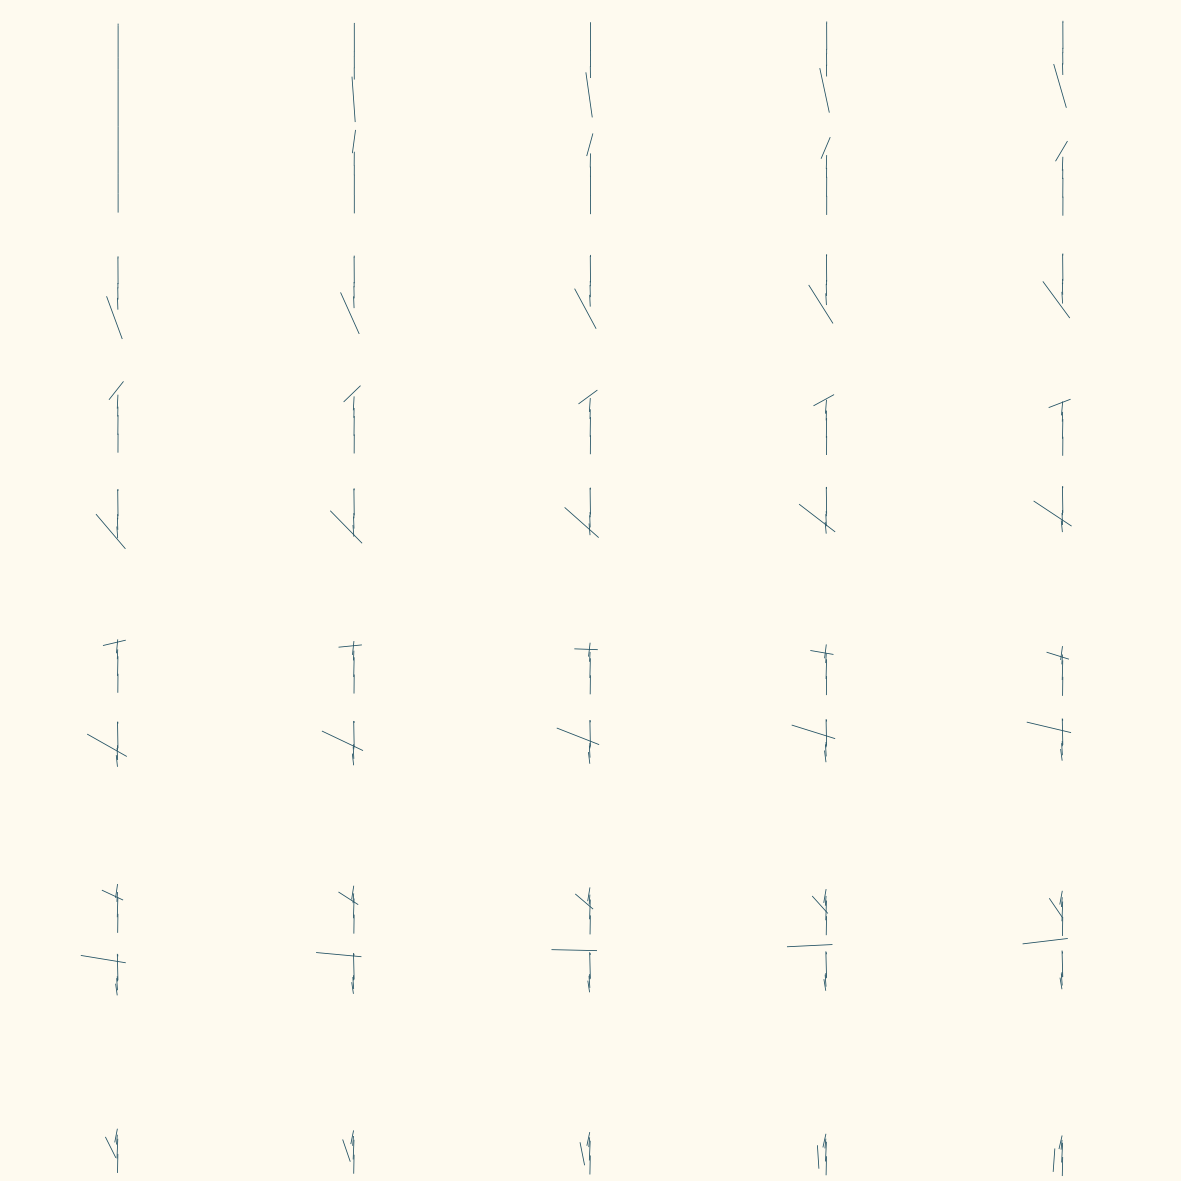

In [7]:
tiled_page = draw.setup_tiled_page(n_cols=5,n_rows=5)
ec = e_split.copy()
for i,j in itertools.product(range(5), repeat=2):

        draw.draw_edges_on_tile(
            ec.edges,
            j,
            i,
            tile_size=100,
            page=tiled_page,
            v=False
        )
        ec.step(1)
Image(tiled_page.image(kind="rgba", ppi=60).png())

### Shattered stacked line

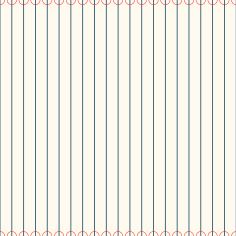

In [29]:
params = dict(n_lines = 21, np_seed=42)
np.random.seed(params["np_seed"])
edges = np.array([[[x*5,0,0],[x*5,100,0]] for x in range(0,params["n_lines"])])

e_prime = EdgeCollection(edges)
page = draw.quick_draw_edges(e_prime.edges, v=True)
Image(page.image(kind="rgba", ppi=60).png())

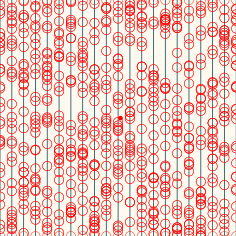

In [30]:
push_params = dict(point=[51,50, 0], force=10, lin_scale=100, rot_scale=1)
params = params | dict(n_splits=30, push_params=push_params)

e_split = EdgeCollection(transform.rand_split_edge(e_prime.edges[0],params["n_splits"]))
for e in e_prime.edges[1:]:
    e_split = e_split.combine(EdgeCollection(transform.rand_split_edge(e,params["n_splits"])))

transform.point_push(e_split, push_params["force"],  np.array([push_params["point"]]), lin_scale =push_params["lin_scale"], rot_scale=push_params["rot_scale"])
page = draw.quick_draw_edges(e_split.edges, v=True)
page.place(style.full_red.circle(*push_params["point"][:2], 1))
Image(page.image(kind="rgba", ppi=60).png())

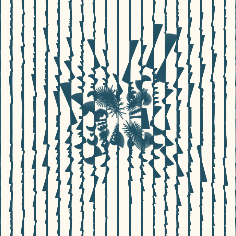

In [31]:

ec = e_split.copy()
page = draw.quick_draw_edges(ec.edges, v=False)

for i in range (25):
    ec.step()
    draw.quick_draw_edges(ec.edges, v=False, page=page)

Image(page.image(kind="rgba", ppi=60).png())

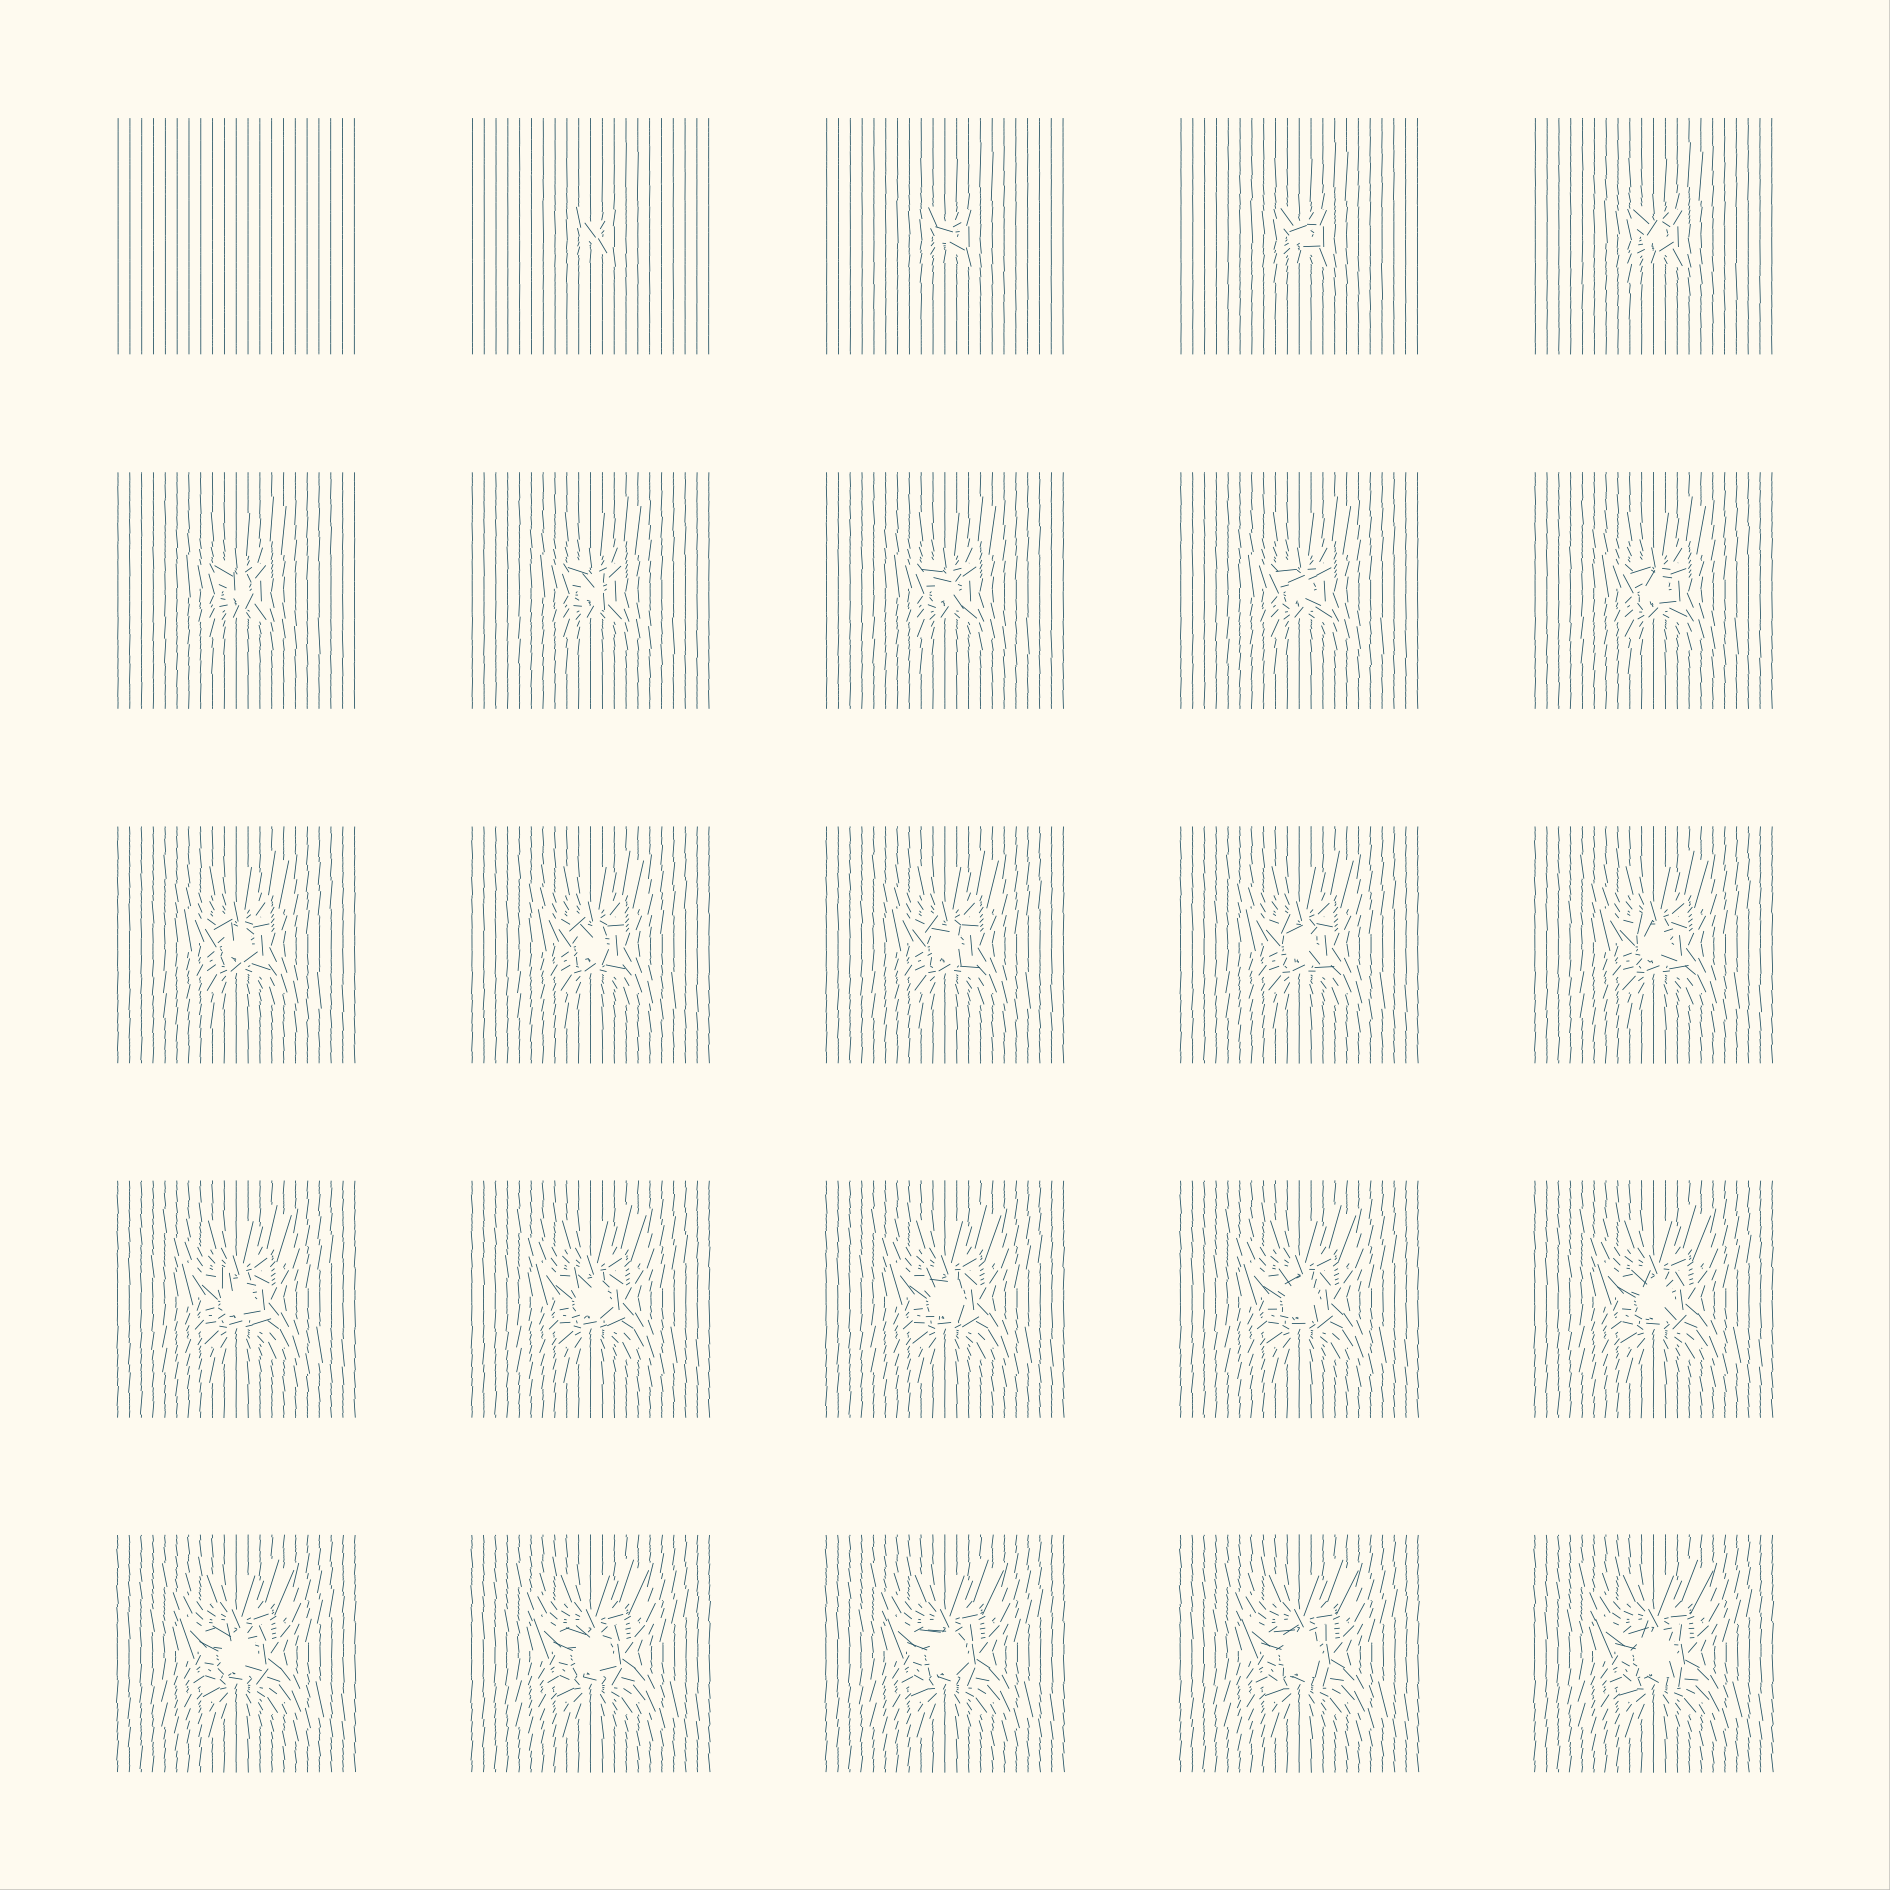

In [42]:
tiling_params = dict(
    tile_size = (100, 100),
    n_tiles= (5,5),
    gap = (50,50),
)
params["tiling_params"] = tiling_params

tiled_page, tile_origins = draw.setup_tiled_page(**tiling_params)
ec = e_split.copy()
for i,j in itertools.product(range(tiling_params["n_tiles"][0]),range(tiling_params["n_tiles"][1])):

        draw.draw_edges_on_tile(
            ec.edges,
            j,
            i,
            page=tiled_page,
            origins=tile_origins,
            v=False
        )
        ec.step()
draw.page_save_iteration(tiled_page, name="shattered_verticals", show=True, **params)